<a href="https://colab.research.google.com/github/Mohd-Saif-IITB/Python-for-Oil-Gas/blob/main/Decline_Curve_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**For more visit:** https://github.com/yohanesnuwara

In [30]:
# Get DCA(decline curve analysis) utility(personal function) from the source and import some functions from within it

!wget https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/DCA.py
from DCA import arps_fit,remove_outlier


--2022-03-19 21:27:04--  https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/DCA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7857 (7.7K) [text/plain]
Saving to: ‘DCA.py.2’

DCA.py.2            100%[===================>]   7.67K  --.-KB/s    in 0s      

2022-03-19 21:27:05 (42.8 MB/s) - ‘DCA.py.2’ saved [7857/7857]



**Importing different libraries which we need here**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Now linking the path our production data from which we will analyse decline curve**

In [32]:
# Production data link

path="https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/Volve%20production%20analysis%20data.csv"

**Reading the data and choosing well & columns of interest**

In [33]:
# reading the data using pandas

df=pd.read_csv(path)
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,15-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,16-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,17-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [34]:
# Dont forget to convert date format to pandas datetime format(yyyy-mm-dd)

df['DATEPRD']=pd.to_datetime(df['DATEPRD'],format="%d-%b-%y") # write column name as it is-DATEPRD (case-sensitive)
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,2016-09-17,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [35]:
# Now finding unique well bore names

df['NPD_WELL_BORE_NAME'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

In [36]:
# Lets say we want to work on well named as 15/9-F-14, so we take all data out related to this well

mask=df['NPD_WELL_BORE_NAME']=="15/9-F-14"
df2=df[mask] # without resetting index
df2

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


In [37]:
# Dont forget to reset index

df2=df[mask].reset_index()
df2 # now we can see index 4967 is resetted to 0

,index,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
1,4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
2,4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
3,4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4,4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
3052,8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
3053,8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
3054,8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


In [38]:
# Our Dataframe only has 2 columns of interest:time and rate of production of oil which will be used for decline curve analysis
# so we need to take this out

df2=df2[['DATEPRD','BORE_OIL_VOL']]
df2

,DATEPRD,BORE_OIL_VOL
0,2008-02-12,0.0
1,2008-02-13,0.0
2,2008-02-14,0.0
3,2008-02-15,0.0
4,2008-02-16,0.0
...,...,...
3051,2016-09-13,0.0
3052,2016-09-14,0.0
3053,2016-09-15,0.0
3054,2016-09-16,0.0


**Plotting Oil Production rate**

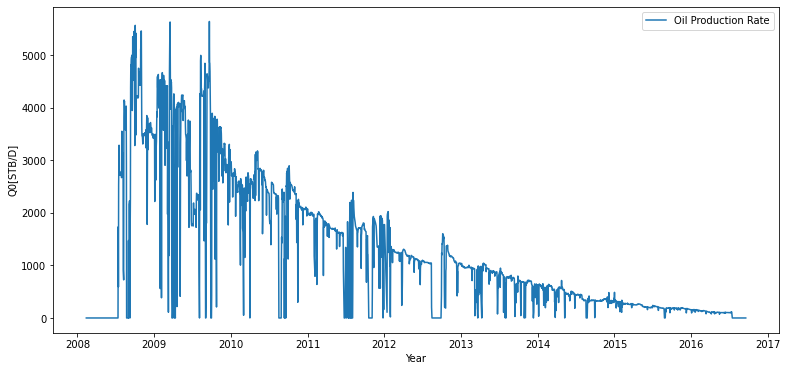

In [39]:
plt.figure(figsize=(13,6))

plt.plot(df2['DATEPRD'],df2['BORE_OIL_VOL'],label='Oil Production Rate') # (x-axis,y-axis)
plt.ylabel("Q0[STB/D]") # Q0 is initial production rate
plt.xlabel("Year")
plt.legend() # label 'Oil Production Rate' will not be visible if we forget this

plt.show() # we see lots of outliers of bore oil vol. that is showing zero production, we need to remove those

**Removing Outliers**

In [40]:
help(remove_outlier) # to understand our imported library from DCA

Help on function remove_outlier in module DCA:

remove_outlier(df, column_name, window, number_of_stdevs_away_from_mean, trim=False)
    Removing outlier of production data and trim initial buildup
    
    INPUT:
    
    df: Production dataframe
    column_name: Column name of production rate
    window: Rolling average window
    number_of_stdevs_away_from_mean: Distance from standard dev. where outliers
                                     will be removed
    trim: Option to trim initial buildup (Because buildup is an outlier). 
          Default is False.
    
    OUTPUT:
    
    df: New dataframe where outliers have been removed



In [41]:
# Removing outliers(use window=150,num_stdev=50): window is rolling average window

df_new=remove_outlier(df2,"BORE_OIL_VOL",150,50,) # if we see the curve is not smooth then increase window and stdev values here
df_new

/content/DCA.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name+'_rol_Av']=df[column_name].rolling(window=window, center=True).mean()
/content/DCA.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name+'_rol_Std']=df[column_name].rolling(window=window, center=True).std()
/content/DCA.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,DATEPRD,BORE_OIL_VOL,BORE_OIL_VOL_rol_Av,BORE_OIL_VOL_rol_Std,BORE_OIL_VOL_is_Outlier
75,2008-04-27,0.0,0.000000,0.000000,False
76,2008-04-29,0.0,0.000000,0.000000,False
77,2008-04-30,0.0,11.566667,141.662157,False
78,2008-05-01,0.0,15.513333,149.374298,False
79,2008-05-02,0.0,32.393333,254.018889,False
...,...,...,...,...,...
2977,2016-07-01,103.0,60.206667,51.039831,False
2978,2016-07-02,102.0,59.426667,51.060084,False
2979,2016-07-03,102.0,58.773333,51.190019,False
2980,2016-07-04,101.0,58.026667,51.225249,False


**Plotting Oil Production Rate after removing Outliers and Comparing with original**

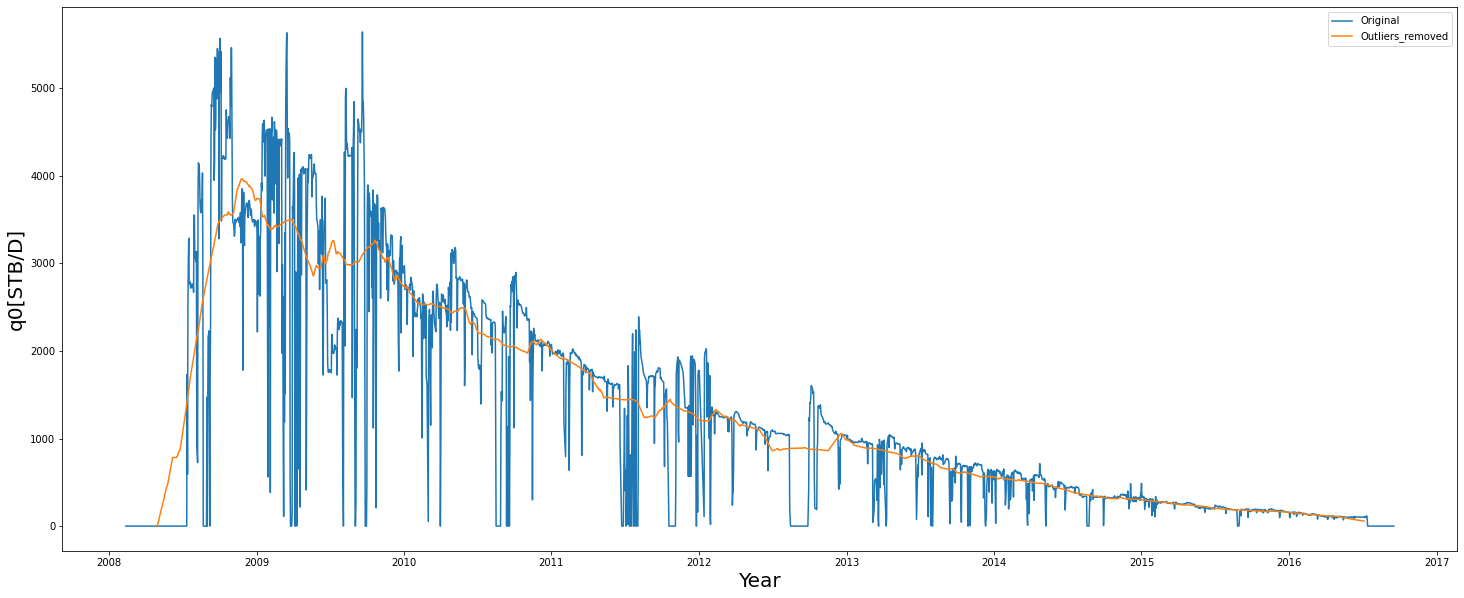

In [42]:
plt.figure(figsize=(25,10))

plt.plot(df2['DATEPRD'],df2['BORE_OIL_VOL'],label="Original")
plt.plot(df_new['DATEPRD'],df_new['BORE_OIL_VOL_rol_Av'],label='Outliers_removed')
plt.legend()

plt.ylabel("q0[STB/D]",size=20)
plt.xlabel("Year",size=20)

plt.show()# we are getting initial increase in production and we need to trim outlier also

**Removing & Trimming Outliers and Plotting it again**

In [43]:
df_new=remove_outlier(df2,"BORE_OIL_VOL",150,50,trim=True)
df_new

/content/DCA.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name+'_rol_Av']=df[column_name].rolling(window=window, center=True).mean()
/content/DCA.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name+'_rol_Std']=df[column_name].rolling(window=window, center=True).std()
/content/DCA.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,DATEPRD,BORE_OIL_VOL,BORE_OIL_VOL_rol_Av,BORE_OIL_VOL_rol_Std,BORE_OIL_VOL_is_Outlier
0,2009-02-08,4670.0,3392.213333,1336.562447,False
1,2009-02-09,3724.0,3395.093333,1337.610533,False
2,2009-02-10,4416.0,3396.673333,1338.294846,False
3,2009-02-11,4380.0,3398.480000,1339.070527,False
4,2009-02-12,4441.0,3413.633333,1333.493149,False
...,...,...,...,...,...
2617,2016-07-01,103.0,60.206667,51.039831,False
2618,2016-07-02,102.0,59.426667,51.060084,False
2619,2016-07-03,102.0,58.773333,51.190019,False
2620,2016-07-04,101.0,58.026667,51.225249,False


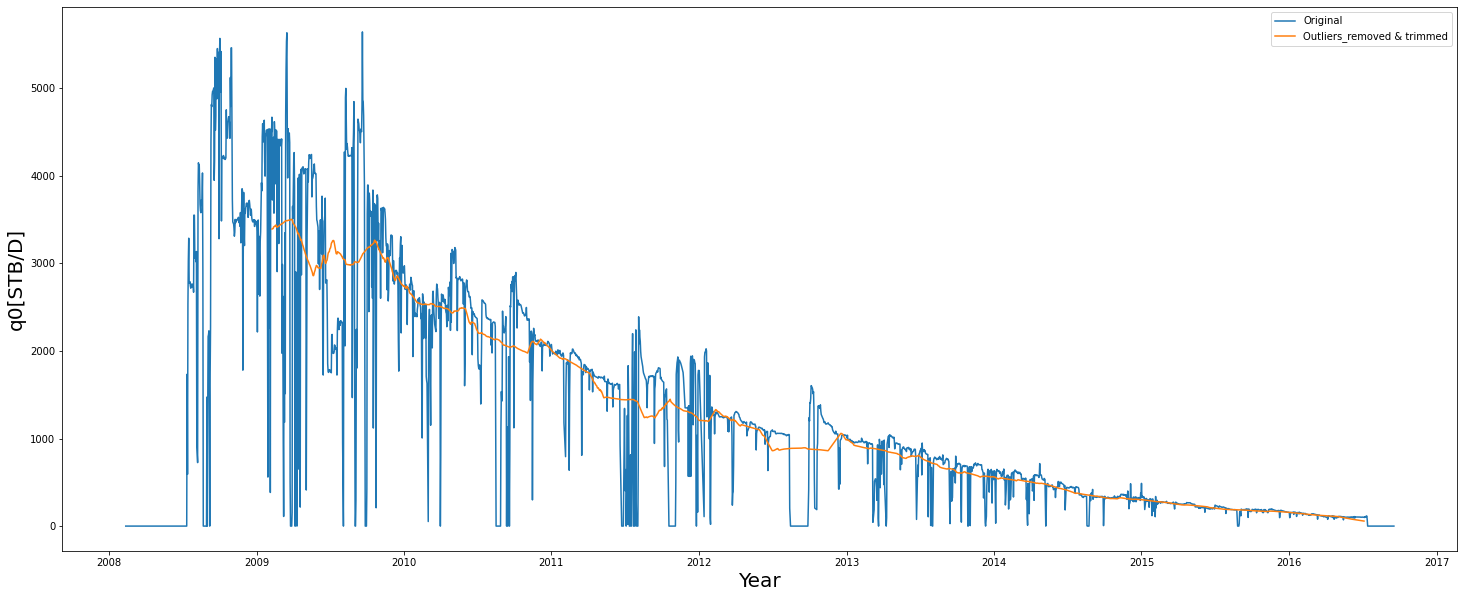

In [44]:
plt.figure(figsize=(25,10))

plt.plot(df2['DATEPRD'],df2['BORE_OIL_VOL'],label="Original")
plt.plot(df_new['DATEPRD'],df_new['BORE_OIL_VOL_rol_Av'],label='Outliers_removed & trimmed')
plt.legend()

plt.ylabel("q0[STB/D]",size=20)
plt.xlabel("Year",size=20)

plt.show()

**Making Decline Curve**

In [45]:
help(arps_fit) # to understand our imported library from DCA # this uses non-linear curve fitting

Help on function arps_fit in module DCA:

arps_fit(t, q, plot=None)
    Arps Decline Curve Analysis using Non-Linear Curve-Fitting
    
    Input:
    t = time array (in numpy datetime64)
    q = production rate array (unit: STB/day, or SCF/day)
    Output:
    qi = initial production rate (unit: STB/day, or SCF/day)
    di = initial decline rate (unit: STB/day, or SCF/day)
    b = decline exponent



Initial production rate (qi)  : 3558.98653 VOL/D
Initial decline rate (di)     : 0.00083 VOL/D
Decline coefficient (b)       : -0.27311
RMSE of regression            : 0.00731


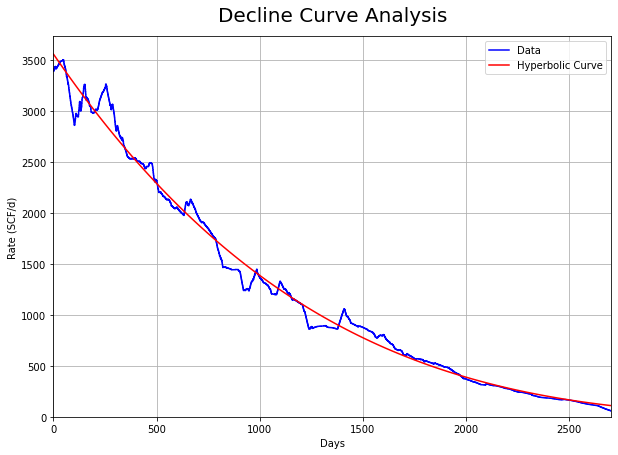

(3558.9865307486853,
 0.000831031813592043,
 -0.2731072703351902,
 0.007306461722037564)

In [46]:
# Define time & production rate(from outlier_removed dataframe)

t=df_new['DATEPRD']
q=df_new['BORE_OIL_VOL_rol_Av']

arps_fit(t,q,plot=True) # we got hyperbolic declination curve(0<b<1)

# If we dont do water injection or any other surface control then 0<b<1 otherwise -ve
# Here we got -0.27 means initial well condition was changed by some water injection maybe